In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
datasets.load_digits().data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<Figure size 432x288 with 0 Axes>

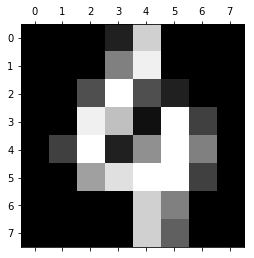

In [3]:
datasets.load_digits().images[1000]
import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(datasets.load_digits().images[100])
plt.show()

# **0_0**

In [0]:
#Load MNIST datset 
digits = datasets.load_digits()
data = digits.data
target = digits.target

In [5]:
data.shape

(1797, 64)

Traian-Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test =  train_test_split(data,target,test_size=0.2)

In [0]:
#function to Create MLP classifier object with hyper parameters
def mlp(activation, solver, hidden_layer, lr):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer,activation=activation,solver=solver,learning_rate_init=lr, max_iter=5000)#Mapping the input parameters passed above to appropriate parameters of Sklearn's 'MLP'
    return clf 
#function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

Hyper parameters for MLP classifier

In [0]:
# activation: Activation functions are critical in introducing non-linearity in MLP (in absence of this all layers of MLP combine into a single layer)
activation = ["identity","logistic","tanh","relu"]
#solvers: The following are the methods by which your weights get updated.
solvers = ["lbfgs","sgd","adam"]
#learning rate
learning_rate = [0.0001,0.001,0.01,0.1]
#hidden layers
hidden_layers = [(5,2),(3,2),(6,3),(7,2)]

In [13]:
test_accuracy = []
validation_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(activation))
    k2 = np.random.randint(0,len(solvers))
    k3 = np.random.randint(0,len(learning_rate))
    k4 = np.random.randint(0,len(hidden_layers))
    print("\nHyper-parameters = \n activation = ", activation[k1],    "\n solver = ", solvers[k2], "\n learning_rate_init = ", learning_rate[k3], "\n hidden_layer_sizes = ", hidden_layers[k4])
    #calling the mlp function with random hyper paramters
    clf = mlp(activation[k1],solvers[k2],hidden_layers[k4],learning_rate[k3])
    #Fitting the data into model
    clf.fit(X_train,Y_train)
    #Predicting the values on trained model using train data
    predTrain = clf.predict((X_train))# YOUR CODE HERE
    #Calculating the train accuracy
    predTrainAcc = accuracy(Y_train,predTrain)
    train_accuracy.append(predTrainAcc)
    # Predicting the values on trained model using test data
    predTest = clf.predict((X_test))
    #Calculating the test accuracy
    predTestAcc = accuracy(Y_test,predTest)
    test_accuracy.append(predTestAcc)
    print("(train,  test) accuracy = ", predTrainAcc, predTestAcc)


Hyper-parameters = 
 activation =  identity 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (5, 2)
(train,  test) accuracy =  0.8197633959638135 0.7527777777777778

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (6, 3)
(train,  test) accuracy =  0.9151009046624913 0.8722222222222222

Hyper-parameters = 
 activation =  logistic 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (5, 2)
(train,  test) accuracy =  0.5560194850382741 0.5055555555555555

Hyper-parameters = 
 activation =  identity 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (7, 2)
(train,  test) accuracy =  0.8211551844119693 0.75

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)
(train,  test) accuracy =  0.8538622129436325 0.8083333333333333

Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init 

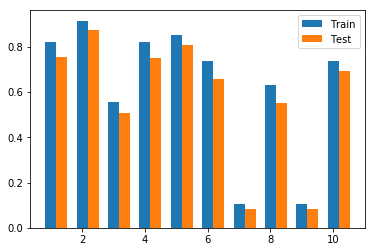

In [14]:
## Plotting the data
xx = np.array(range(1,11))
#Bar chart to compare train_accuracy and test_accuracy
plt.bar(xx,train_accuracy, width=0.35)
plt.bar(xx + 0.35,test_accuracy, width=0.35)
plt.legend(["Train","Test"])
plt.show()